In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab_3_plotting.ipynb")

## Lab 3: Plotting data

Read in the right hand accelerometer data for subject 1's first clap and plot it for each of the x, y, and z channels. I recommend doing this in the following order:

- Write plotting code for a single dimension. Make sure it's working and the titles/labels etc are correct 
- Once that's working, add a **for** loop to loop over x, y, z
- If doing a **for** loop is confusing, then start with just copying the code over, once, and changing the dimension you're using in the copy. Then go back and put the for loop in

[optional] Do nicer colors than the default ones.

For setting the colors and the data labels, you can either do it by hand, or setup a list of color names and use that.

Slides: https://docs.google.com/presentation/d/1IiGGUNet-4Nj07x2cTXU6IOYXy9TSdAF5OUWCCKIYEM/edit?usp=sharing


In [2]:
# Libraries that we need to import - numpy and json (for loading the description file)
import numpy as np
import json as json
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
# Numeric ids to indicate hand motion type from Lab 1
clap_id = 1
high_five_id = 2
snap_id = 3

In [4]:
# TODO: Copy get_descriptor, get_file_info, get_data, get_data_from_files, get_channel_data from lab 2.
#  Put each function in its own cell
def get_descriptor(data_description, name):
    """ Search through data_description to find the dictionary with name "name"
    @param name - The name of the data channel to look for. 
    @return the dictionary that has name as the 'name' key"""

    for description in data_description["data_channels"]:
        if description["name"] == name: #if the name element is the desired name
            return description #return the dictionary

In [5]:
def get_file_info(csv_path):
    """Function that returns a file_info dictionary for a given filepath.
    @param csv_path - path to a CSV file containing a hand motion
    @return A dictionary with key "csv_path", containing csv_path, and "motion_id", containing the type of motion encoded in the file."""
    # The base file path is of the form S##[C|F|S]##.csv.

    file_char = os.path.basename(csv_path)[3] #extracting C, F, or S from filename

    motion_id = 0 #creating varaible to hold motion id number

    #checks for char and assigns correct motion id
    if file_char == 'C':
        motion_id = clap_id
    elif file_char == 'F':
        motion_id = high_five_id
    elif file_char == 'S':
        motion_id = snap_id

    return {'csv_path' : csv_path, 'motion_id' : motion_id}


In [6]:
def get_data(file_info):
    """ Function that returns the data from the given CSV file.
    @param file_info - a dictionary with keys "csv_path" and "motion_id"
    @return Return array should contain data in file with an extra column at the end containing the motion_id."""

    fname = file_info["csv_path"] #extracting file name from file_info argument

    file_data = np.loadtxt(fname=fname, dtype="float", delimiter=',') #reading desired file

    arr_shape = np.shape(file_data) #getting shape of data set

    rows = arr_shape[0] #variable for number of rows
    columns = arr_shape[-1] #variable for number of columns

    read_data = np.zeros((rows, columns + 1)) #creating empty array for data + motion id

    read_data[:,0:columns] = file_data #inserting data into new array

    read_data[:,-1] = file_info["motion_id"] #assignming motion id

    return read_data

In [7]:
def get_data_from_files(file_list):
    """ Function that returns data from a list of files.
    @param file_list - a list of dictionaries, where each dictionary contains `csv_path` and `motion_id`.
    @return A single return array containing the data from all of the given input files."""
    # Hint: Use np.concatenate to combine multiple numpy arrays.
    
    all_data = [] #empty list for all of the data

    for file in file_list: #loops through each file
        data = get_data(file) #gets data from n file in list
        all_data.append(data) #appends file data onto all_data (list of arrays)
    
    return np.concatenate(all_data) #returns a combination of all arrays in the list

In [8]:
def get_channel_data(all_data, index_offset, n_dims):
    """ Get the data for just one channel (e.g., right hand accelerometer)
    @param all_data - numpy array containing data from one (or more) files
    @param index_offset - the column to begin getting data from
    @param n_dims - number of dimensions for the data channel
    @return Returned array should be: number of rows in all_data X n_dims"""

    return all_data[:, index_offset : index_offset + n_dims]

In [9]:
# Read in one data file and the data description.
all_data = get_data_from_files([
    get_file_info("Data/S01C01.csv"),
])

try:
    with open("Data/data_description.json", "r") as fp:
        data_description = json.load(fp)
except FileNotFoundError:
    print(f"The file was not found; check that the data directory is in the current one and the file is in that directory")


In [10]:
# TODO Get the descriptor and the data
rh_accelerometer_descriptor = get_descriptor(data_description, "Right hand accelerometer")
rh_accelerometer_data = all_data[:, rh_accelerometer_descriptor["index_offset"] : rh_accelerometer_descriptor["index_offset"] + rh_accelerometer_descriptor["dimensions"]]

ts_descriptor = get_descriptor(data_description, "Timestamp")
ts = all_data[:, ts_descriptor["index_offset"]]

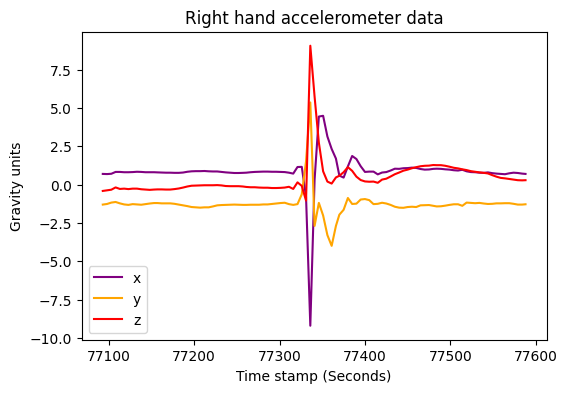

In [11]:
nrows = 1
ncols = 1
_, axs_wf = plt.subplots(nrows, ncols, figsize=(6, 4))

# Useful for labeling the channels with x,y,z instead of 0, 1, 2
channel_labels = ['x', 'y', 'z']

# TODO: Graph the right hand accelerometer data.

x = rh_accelerometer_data[:,0] #vector for x values
y = rh_accelerometer_data[:,1] #vector for y values
z = rh_accelerometer_data[:,2] #vector for z values

axs_wf.plot(ts, x, color = 'purple', label = channel_labels[0]) #plotting x values
axs_wf.plot(ts, y, color = 'orange', label = channel_labels[1]) #plotting y values
axs_wf.plot(ts, z, color = 'red', label = channel_labels[2]) #plotting z values

axs_wf.set_title("Right hand accelerometer data") #plot title
axs_wf.set_ylabel("Gravity units") #vertical axis label
axs_wf.set_xlabel("Time stamp (Seconds)") #horizontal axis label

axs_wf.legend(loc = 'lower left')

In [12]:
grader.check("plot_one")

plot_one results: All test cases passed!

## Part 2 - plot both the right hand gyroscope and right hand accelerometer in the same figure
Gyroscope on the left, Accelerometer on the right. Don't forget labels and titles.

You can do this one of two ways; note that in the homework you'll need to do the 2nd option (with some help), but if you want to try it now, feel free.
- Option 1: Copy and paste the code from above (twice) and change the relevant data/lines of code (axs[], names/titles, start index) in the second copy
- Option 2: Encapsulate the plotting part in a function then call that function twice
  - pass in the axes to plot in, along with t values (or create them within the function)
  - do the x,y,z loop inside of the plot

In [13]:
# Reading the right hand gyroscope data for you
rh_gyroscope_descriptor = get_descriptor(data_description, "Right hand gyroscope")
rh_gyroscope_data = get_channel_data(all_data, index_offset=rh_gyroscope_descriptor["index_offset"], n_dims=rh_gyroscope_descriptor["dimensions"])

In [14]:
# TODO: Fill in the plot function
#  Reminder to use axs to plot, not plt
def plot_function(axs, ts, data, channel_info, your_choice):
    """ Plot all of the dimensions for a given channel
    @param axs - the place to plot in
    @param ts - the time steps to use
    @param data - the numpy array from the csv file
    @param channel_info - a dictionary with the channel info, e.g. "name" and "units"
    @param your_choice - either total number of columns or names for the dimensions
    @returns - nothing"""

    x = data[:, 0] #gets x data from data
    y = data[:, 1] #gets y data from data
    z = data[:, 2] #gets z data from data
    
    axs.plot(ts, x, color = 'purple', label = channel_labels[0]) #plotting x values
    axs.plot(ts, y, color = 'orange', label = channel_labels[1]) #plotting y values
    axs.plot(ts, z, color = 'red', label = channel_labels[2]) #plotting z values

    axs.set_title(f"{channel_info['name']}") #plot title
    axs.set_ylabel("Gravity units") #vertical axis label
    axs.set_xlabel("Time stamp (Seconds)") #horizontal axis label

    axs.legend()

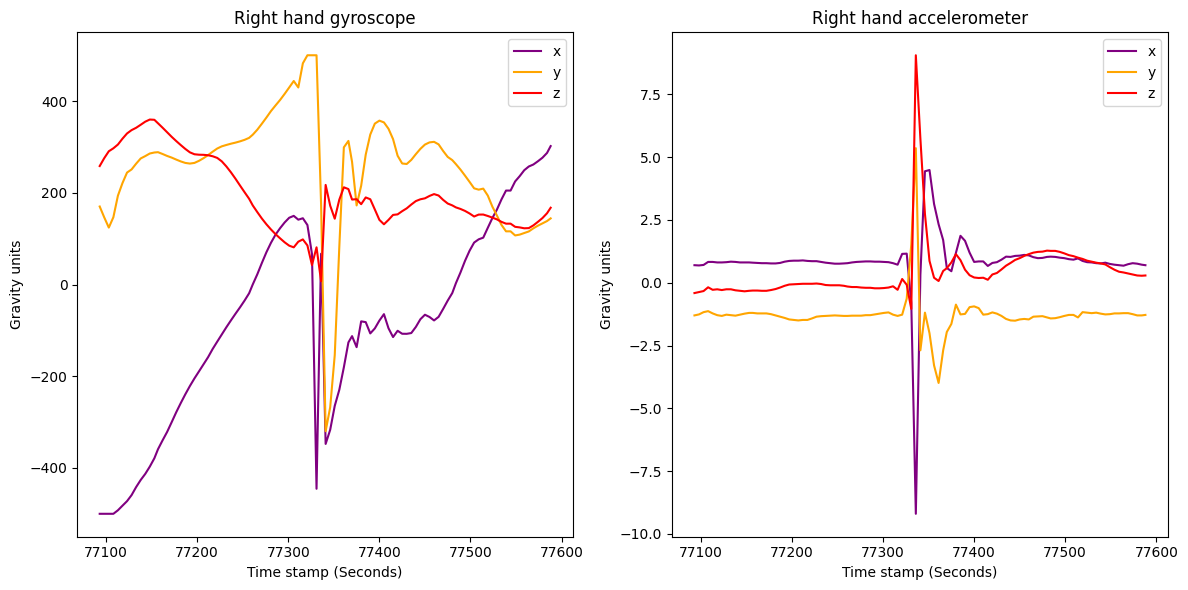

In [15]:
# TODO: Call subplots here (Do not change axs_two). One row, two columns
nrows = 1
ncols = 2
fig, axs_two = plt.subplots(nrows, ncols, figsize=(12, 6))

# TODO Call plot function here, once with the gyroscope data, once with the accelerometer data
plot_function(axs_two[0], ts, rh_gyroscope_data, rh_gyroscope_descriptor, channel_labels) #gyroscope plot

plot_function(axs_two[1], ts, rh_accelerometer_data, rh_accelerometer_descriptor, channel_labels) #accelerometer plot

fig.tight_layout()
plt.show()

In [16]:
grader.check("plot_gyroscope_and_accelerometer")

plot_gyroscope_and_accelerometer results: All test cases passed!

### Plotting all data channels

In the previous step, you made plots for the right hand accelerometer and gyroscope. Now, let's make plots for every data channel (except for "Timestamp").

The first column should be the left hand data channels, and the second column should be the right hand data channels. The first row should be the accelerometers, and the second row should be the gyroscopes.

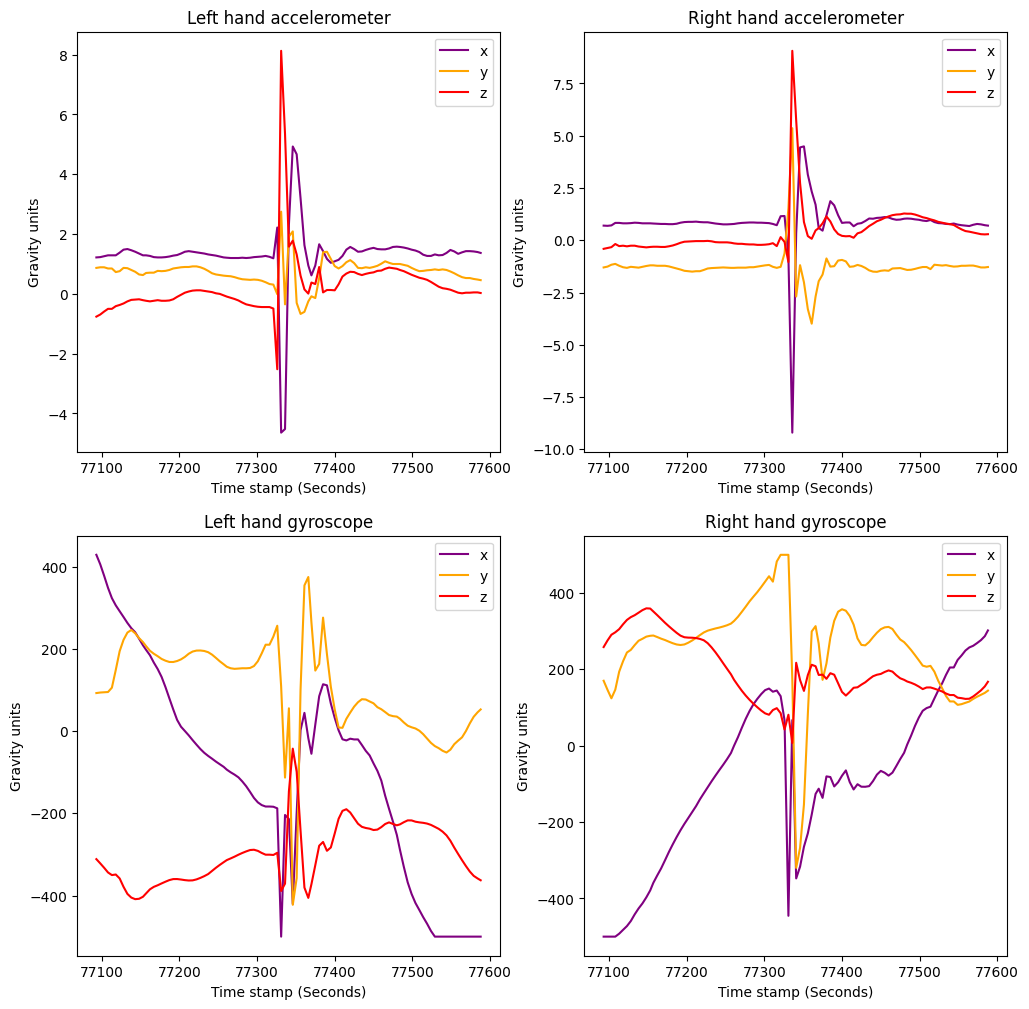

In [17]:
# TODO: Get the descriptor and the data
lh_accelerometer_descriptor = get_descriptor(data_description, "Left hand accelerometer")
lh_accelerometer_data = all_data[:, lh_accelerometer_descriptor["index_offset"] : lh_accelerometer_descriptor["index_offset"] + lh_accelerometer_descriptor["dimensions"]]

lh_gyroscope_descriptor = get_descriptor(data_description, "Left hand gyroscope")
lh_gyroscope_data = all_data[:, lh_gyroscope_descriptor["index_offset"] : lh_gyroscope_descriptor["index_offset"] + lh_gyroscope_descriptor["dimensions"]]


# TODO: Create the figure (2 rows, 2 columns)
nrows = 2
ncols = 2
_, axs_all = plt.subplots(nrows, ncols, figsize=(12, 12))

# TODO: Call plot_function for each data channel.
plot_function(axs_all[1,1], ts, rh_gyroscope_data, rh_gyroscope_descriptor, channel_labels) #rh gyroscope plot

plot_function(axs_all[0,1], ts, rh_accelerometer_data, rh_accelerometer_descriptor, channel_labels) #rh accelerometer plot

plot_function(axs_all[1,0], ts, lh_gyroscope_data, lh_gyroscope_descriptor, channel_labels) #lh gyroscope plot

plot_function(axs_all[0,0], ts, lh_accelerometer_data, lh_accelerometer_descriptor, channel_labels) #lh accelerometer plot

fig.tight_layout()

In [18]:
grader.check("plot_all")

plot_all results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [19]:

# List of names (creates a set)
worked_with_names = {"N/A"}
# List of URLS 2S5 (creates a set)
websites = {"https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html, "}
# Approximate number of hours, including lab/in-class time
hours = 1.6

In [20]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

### To submit

- Make sure your plots are visible and there aren't pages of print outs the TAs have to look through to find them
- Save the file
- Submit just this .ipynb file through gradescope, Lab 3, plotting
- You do NOT need to submit the data files - we will supply those
- Where there are given variable/file names (eg, foo = ...) DON'T change those, or the autograder will fail

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

Most likely failure for this assignment is not naming the data directory and files correctly; capitalization matters for the Gradescope grader. 

Second most likely cause for failure is reading in any files but `data/S01C01.csv` (make sure when you copied your code over you didn't accidentally include code that reads in other files)

Several of these problems are manually graded by looking at the plots. If we can't see the plots, we can't grade them.